In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_raw = {
    'Expert': {
        'gpt-4o-mini': {
            'Dog': {
                'preprocessed': {'ROUGE': 0.243, 'BERTScore': 0.717},
                'raw': {'ROUGE': 0.243, 'BERTScore': 0.715}
            },
            'Cat': {
                'preprocessed': {'ROUGE': 0.249, 'BERTScore': 0.719},
                'raw': {'ROUGE': 0.250, 'BERTScore': 0.719}
            }
        },
        'qwen-2.5-7b': {
            'Dog': {'preprocessed': {'ROUGE': 0.189, 'BERTScore': 0.704},
                    'raw': {'ROUGE': 0.192, 'BERTScore': 0.703}},
            'Cat': {'preprocessed': {'ROUGE': 0.193, 'BERTScore': 0.704},
                    'raw': {'ROUGE': 0.197, 'BERTScore': 0.704}}
        },
        'exaone-3.5-7.8b': {
            'Dog': {'preprocessed': {'ROUGE': 0.228, 'BERTScore': 0.709},
                    'raw': {'ROUGE': 0.224, 'BERTScore': 0.703}},
            'Cat': {'preprocessed': {'ROUGE': 0.232, 'BERTScore': 0.710},
                    'raw': {'ROUGE': 0.231, 'BERTScore': 0.705}}
        }
    },
    'Non Expert': {
        'gpt-4o-mini': {
            'Dog': {'preprocessed': {'ROUGE': 0.226, 'BERTScore': 0.708},
                    'raw': {'ROUGE': 0.225, 'BERTScore': 0.708}},
            'Cat': {'preprocessed': {'ROUGE': 0.231, 'BERTScore': 0.710},
                    'raw': {'ROUGE': 0.232, 'BERTScore': 0.711}}
        },
        'qwen-2.5-7b': {
            'Dog': {'preprocessed': {'ROUGE': 0.191, 'BERTScore': 0.705},
                    'raw': {'ROUGE': 0.192, 'BERTScore': 0.703}},
            'Cat': {'preprocessed': {'ROUGE': 0.193, 'BERTScore': 0.704},
                    'raw': {'ROUGE': 0.195, 'BERTScore': 0.703}}
        },
        'exaone-3.5-7.8b': {
            'Dog': {'preprocessed': {'ROUGE': 0.201, 'BERTScore': 0.697},
                    'raw': {'ROUGE': 0.199, 'BERTScore': 0.693}},
            'Cat': {'preprocessed': {'ROUGE': 0.208, 'BERTScore': 0.699},
                    'raw': {'ROUGE': 0.204, 'BERTScore': 0.693}}
        }
    }
}

In [124]:
MODEL_NAME = 'gpt-4o-mini'
# MODEL_NAME = 'exaone-3.5-7.8b'
# MODEL_NAME = 'qwen-2.5-7b'

/tmp/ipykernel_1918069/1754115305.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
/tmp/ipykernel_1918069/1754115305.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)


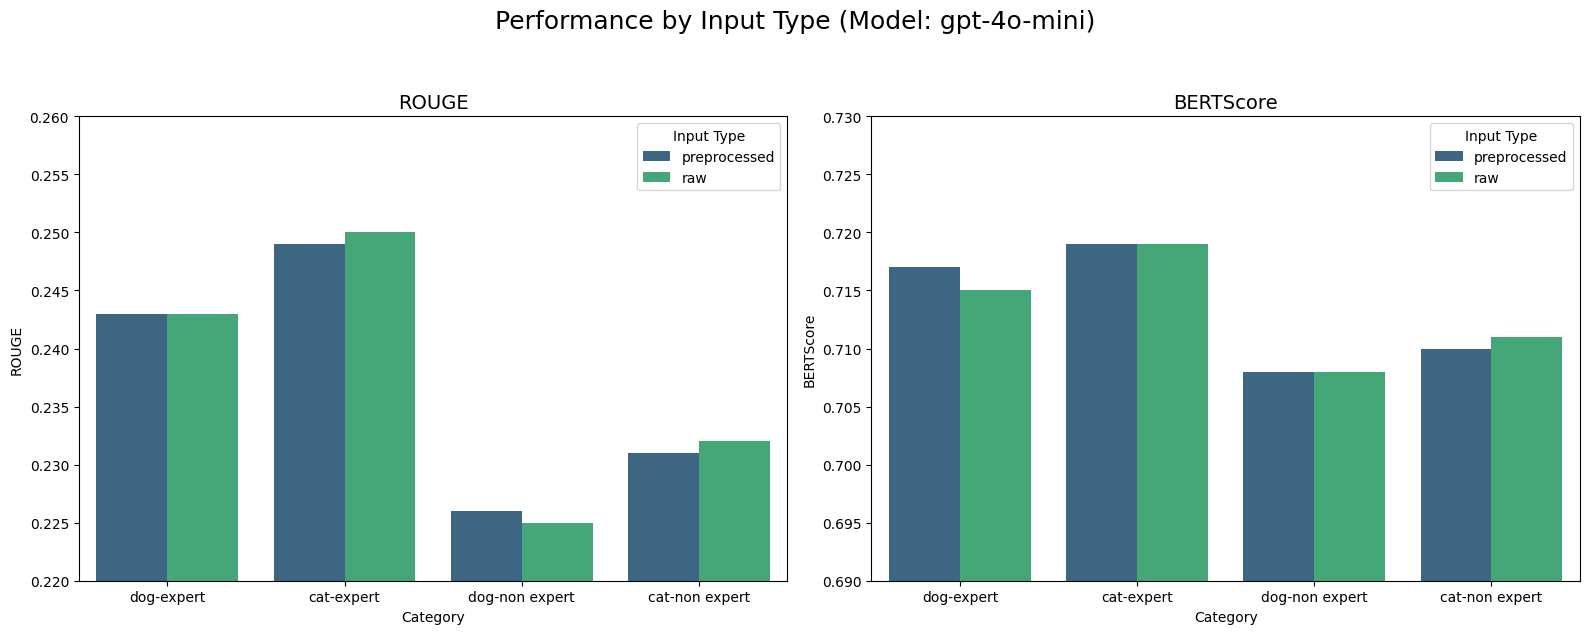

In [126]:
data_list = []
for answer_type, models_data in data_raw.items():
    for model, animal_types in models_data.items():
        for animal, input_types_data in animal_types.items():
            for input_type, scores in input_types_data.items():
                row = {
                    'Answer Type': answer_type,
                    'Model': model,
                    'Animal': animal,
                    'Input Type': input_type,
                    'ROUGE': scores['ROUGE'],
                    'BERTScore': scores['BERTScore']
                }
                data_list.append(row)
                
df = pd.DataFrame(data_list)

df['Combined'] = df['Animal'].str.lower() + '-' + df['Answer Type'].str.lower()

df_cell1 = df[df['Model'] == MODEL_NAME].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Performance by Input Type (Model: {MODEL_NAME})', fontsize=18, y=1.05)

# ROUGE
sns.barplot(
    ax=axes[0],
    data=df_cell1,
    x='Combined',
    y='ROUGE',
    hue='Input Type',
    palette='viridis'
)
axes[0].set_title('ROUGE', fontsize=14)
axes[0].set_xlabel('Category')
axes[0].set_ylabel('ROUGE')
axes[0].set_ylim(0.22, 0.26)
axes[0].set_yticks(np.arange(0.22, 0.261, 0.005)) 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# BERTScore
sns.barplot(
    ax=axes[1],
    data=df_cell1,
    x='Combined',
    y='BERTScore',
    hue='Input Type',
    palette='viridis'
)
axes[1].set_title('BERTScore', fontsize=14)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('BERTScore')
axes[1].set_ylim(0.69, 0.73)
axes[1].set_yticks(np.arange(0.69, 0.731, 0.005))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()
plt.close()

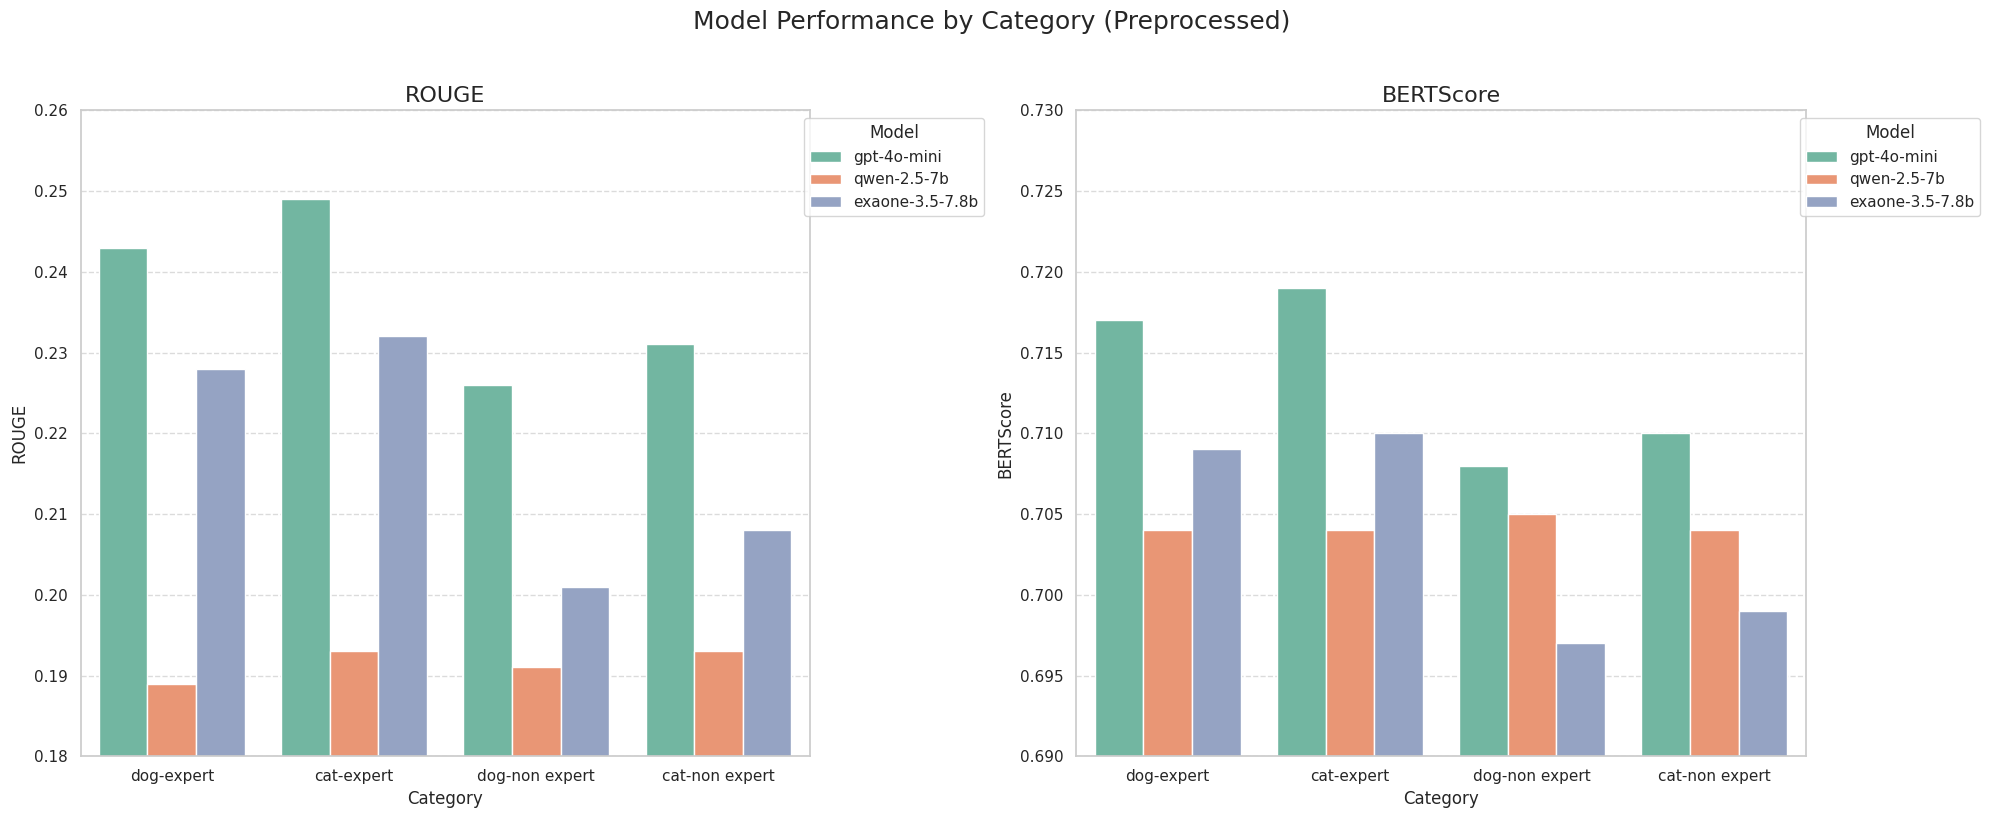

In [150]:
data_list = []
for expertise, models in data_raw.items():
    for model_name, categories in models.items():
        for category, formats in categories.items():
            for input_format, scores in formats.items():
                for score_metric, score_value in scores.items():
                    data_list.append({
                        'Expertise': expertise,
                        'Model': model_name,
                        'Category': category,
                        'Input_Format': input_format,
                        'Score_Metric': score_metric,
                        'Score_Value': score_value
                    })

df = pd.DataFrame(data_list)

# Filter for the 'preprocessed' input format as requested
df_filtered = df[df['Input_Format'] == 'preprocessed'].copy()

# Create a combined category column for the x-axis
df_filtered['Combined_Category'] = df_filtered['Category'].str.lower() + '-' +df_filtered['Expertise'].str.lower()

# Get unique score metrics
score_metrics = df_filtered['Score_Metric'].unique()

# Set up the plot style
sns.set_theme(style='whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Model Performance by Category (Preprocessed)', fontsize=18, y=1.02)

# Define ylim settings for each metric
ylim_settings = {
    'ROUGE': (0.18, 0.26),
    'BERTScore': (0.69, 0.73)
}

# Create plots for each metric
for i, metric in enumerate(score_metrics):
    # Filter data for the current metric
    df_metric = df_filtered[df_filtered['Score_Metric'] == metric]
    
    # Create the plot on the corresponding subplot
    sns.barplot(
        x='Combined_Category',
        y='Score_Value',
        hue='Model',
        data=df_metric,
        ax=axes[i],
        palette='Set2'
    )

    # Set titles and labels
    axes[i].set_title(f'{metric}', fontsize=16)
    axes[i].set_xlabel('Category', fontsize=12)
    axes[i].set_ylabel(f'{metric}', fontsize=12)

    # Set different ylim for each metric
    axes[i].set_ylim(ylim_settings[metric])
    
    # Adjust legend and ticks
    axes[i].legend(title='Model', loc='upper right', bbox_to_anchor=(1.25, 1))
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
plt.close(fig)

In [43]:
INPUT_TYPE = "preprocessed"
# INPUT_TYPE = 'raw'

/tmp/ipykernel_1918069/380963527.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
/tmp/ipykernel_1918069/380963527.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)


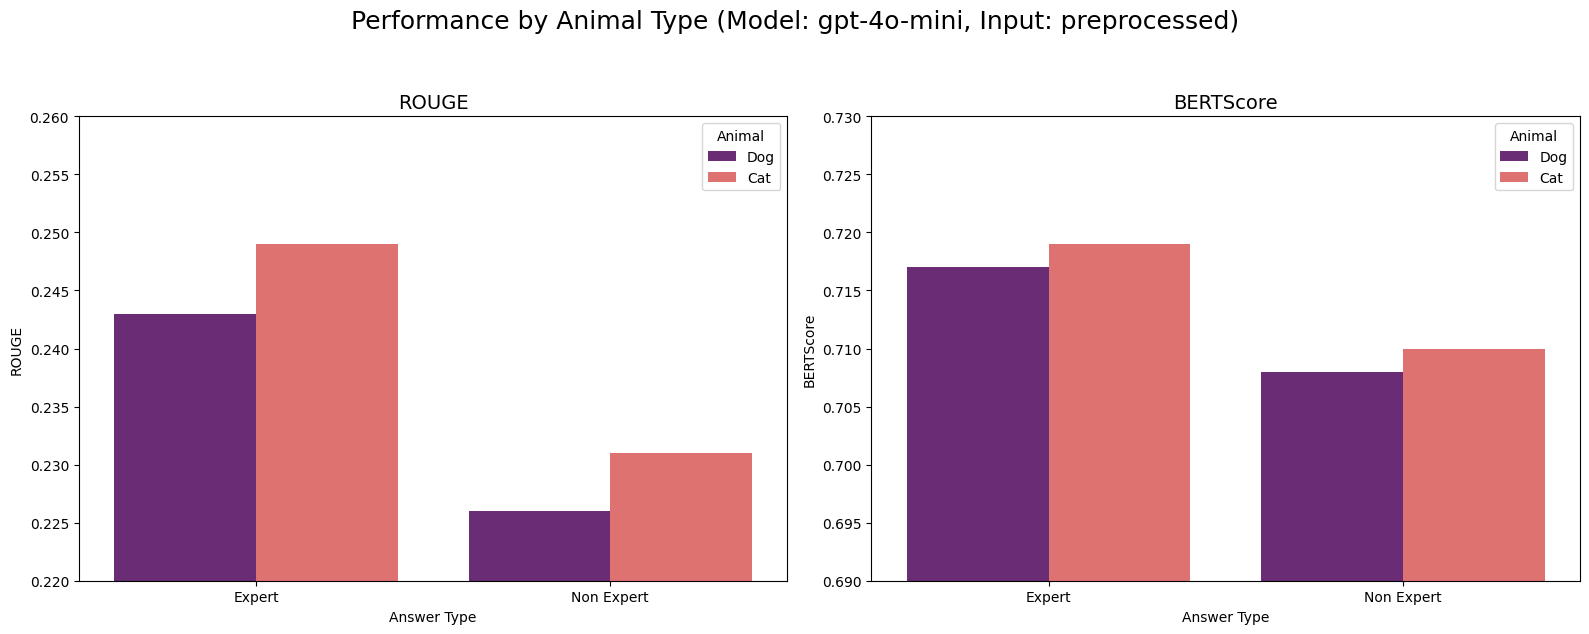

In [120]:
data_list = []
for answer_type, models_data in data_raw.items():
    for model, animal_types in models_data.items():
        for animal, input_types_data in animal_types.items():
            for input_type, scores in input_types_data.items():
                row = {
                    'Answer Type': answer_type,
                    'Model': model,
                    'Animal': animal,
                    'Input Type': input_type,
                    'ROUGE': scores['ROUGE'],
                    'BERTScore': scores['BERTScore']
                }
                data_list.append(row)
df = pd.DataFrame(data_list)

df_cell2 = df[(df['Model'] == MODEL_NAME) & (df['Input Type'] == INPUT_TYPE)].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Performance by Animal Type (Model: {MODEL_NAME}, Input: {INPUT_TYPE})', fontsize=18, y=1.05)

sns.barplot(
    ax=axes[0],
    data=df_cell2,
    x='Answer Type',
    y='ROUGE',
    hue='Animal',
    palette='magma'
)
axes[0].set_title('ROUGE', fontsize=14)
axes[0].set_xlabel('Answer Type')
axes[0].set_ylabel('ROUGE')
axes[0].set_ylim(0.22, 0.26)
axes[0].set_yticks(np.arange(0.22, 0.261, 0.005))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# BERTScore
sns.barplot(
    ax=axes[1],
    data=df_cell2,
    x='Answer Type',
    y='BERTScore',
    hue='Animal',
    palette='magma'
)
axes[1].set_title('BERTScore', fontsize=14)
axes[1].set_xlabel('Answer Type')
axes[1].set_ylabel('BERTScore')
axes[1].set_ylim(0.69, 0.73)
axes[1].set_yticks(np.arange(0.69, 0.731, 0.005))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()
plt.close()

/tmp/ipykernel_1918069/3531653155.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
/tmp/ipykernel_1918069/3531653155.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)


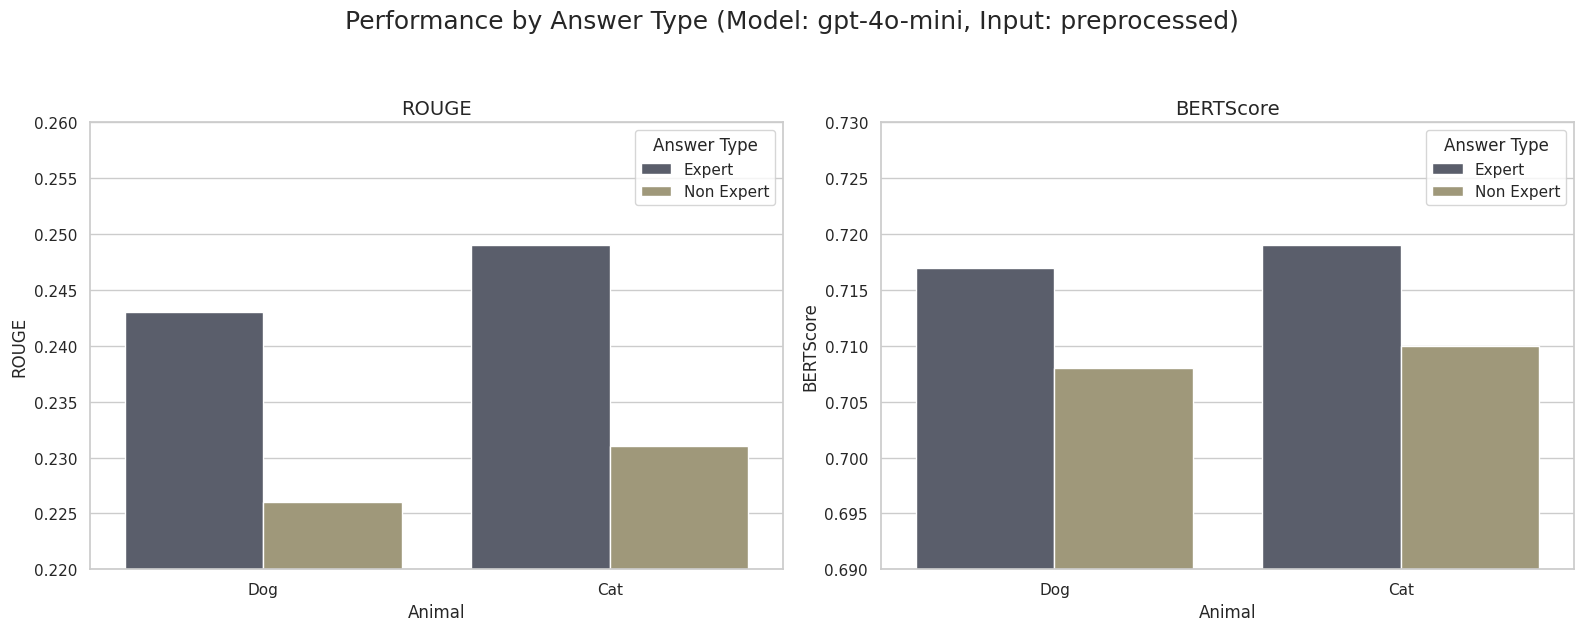

In [149]:
data_list = []
for answer_type, models_data in data_raw.items():
    for model, animal_types in models_data.items():
        for animal, input_types_data in animal_types.items():
            for input_type, scores in input_types_data.items():
                row = {
                    'Answer Type': answer_type,
                    'Model': model,
                    'Animal': animal,
                    'Input Type': input_type,
                    'ROUGE': scores['ROUGE'],
                    'BERTScore': scores['BERTScore']
                }
                data_list.append(row)
df = pd.DataFrame(data_list)

df_cell3 = df[(df['Model'] == MODEL_NAME) & (df['Input Type'] == INPUT_TYPE)].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Performance by Answer Type (Model: {MODEL_NAME}, Input: {INPUT_TYPE})', fontsize=18, y=1.05)

sns.barplot(
    ax=axes[0],
    data=df_cell3,
    x='Animal',
    y='ROUGE',
    hue='Answer Type',
    palette='cividis'
)
axes[0].set_title('ROUGE', fontsize=14)
axes[0].set_xlabel('Animal')
axes[0].set_ylabel('ROUGE')
axes[0].set_ylim(0.22, 0.26)
axes[0].set_yticks(np.arange(0.22, 0.261, 0.005))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

sns.barplot(
    ax=axes[1],
    data=df_cell3,
    x='Animal',
    y='BERTScore',
    hue='Answer Type',
    palette='cividis'
)
axes[1].set_title('BERTScore', fontsize=14)
axes[1].set_xlabel('Animal')
axes[1].set_ylabel('BERTScore')
axes[1].set_ylim(0.69, 0.73)
axes[1].set_yticks(np.arange(0.69, 0.731, 0.005))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()
plt.close()